# Dicoding Final Submission
## Image Classification Model Deployment

Dataset used: <a href="https://www.kaggle.com/datasets/zarkonium/synthetic-image-dataset-cats-dogs-bikes-cars">Synthetic Image Dataset (Cats, Dogs, Bikes, Cars)</a>  
By: Putu Andika Tedja Permana

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Data Preprocessing

In [ ]:
Image_Width = 224
Image_Height = 224
Image_Size = (Image_Width,Image_Height)
Image_Channels = 3
batch_size = 50

In [ ]:
# Make train and validation data generator, with validation split = 0.2
train_datagen = ImageDataGenerator(rotation_range=10,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory='synthetic-image-dataset/',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_directory(directory='synthetic-image-dataset/',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    subset='validation',
                                                    shuffle=True)

Found 20000 images belonging to 4 classes.
Found 5000 images belonging to 4 classes.


## Modelling

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels), padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Define Callbacks

In [ ]:
# Create custom early stopper where minimum accuracy and validation accuracy is 92%
class CustomEarlyStopper(tf.keras.callbacks.Callback):
    def __init__(self, min_accuracy=0.9):
        self.min_accuracy = min_accuracy
    
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > self.min_accuracy and logs.get('val_accuracy') > self.min_accuracy:
            print(f'\nAccuracy reached above {self.min_accuracy}!')
            self.model.stop_training = True

In [ ]:
earlystop = CustomEarlyStopper(min_accuracy=0.92)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
                                           
callbacks = [earlystop, learning_rate_reduction]

## Training

In [ ]:
epochs = 30
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5000//batch_size,
                    steps_per_epoch=20000//batch_size,
                    callbacks=callbacks)

Epoch 1/30
400/400 [==============================] - 421s 1s/step - loss: 0.7721 - accuracy: 0.6102 - val_loss: 0.4445 - val_accuracy: 0.8028 - lr: 0.0010
Epoch 2/30
400/400 [==============================] - 354s 884ms/step - loss: 0.4504 - accuracy: 0.8094 - val_loss: 0.3742 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 3/30
400/400 [==============================] - 341s 851ms/step - loss: 0.3599 - accuracy: 0.8532 - val_loss: 0.3299 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 4/30
400/400 [==============================] - 336s 840ms/step - loss: 0.3305 - accuracy: 0.8652 - val_loss: 0.3017 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 5/30
400/400 [==============================] - 343s 857ms/step - loss: 0.2932 - accuracy: 0.8823 - val_loss: 0.2672 - val_accuracy: 0.8918 - lr: 0.0010
Epoch 6/30
400/400 [==============================] - 350s 874ms/step - loss: 0.2704 - accuracy: 0.8932 - val_loss: 0.2519 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 7/30
400/400 [=============================

#### Save model with saved model format

In [ ]:
model.save('saved_model/model')

INFO:tensorflow:Assets written to: saved_model/model/assets


INFO:tensorflow:Assets written to: saved_model/model/assets


## Plotting

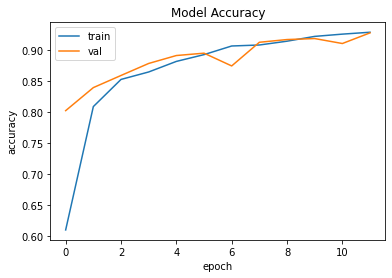

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

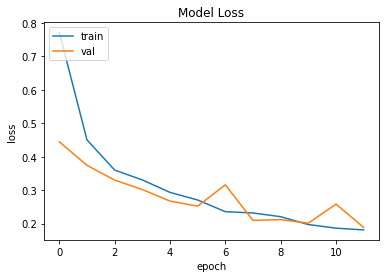

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Convert to TF-Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/model')
tflite_model = converter.convert()
 
with tf.io.gfile.GFile('synthetic_image_model.tflite', 'wb') as f:
    f.write(tflite_model)

2022-09-28 09:57:36.841921: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-28 09:57:36.841980: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
